
# Performance of teams in ODI cricket matches

In this project I am going to analyse the dataset "odi-cricket-matches-19712017" which I took from https://kaggle.com/ . We have four different dataset from which I took two dataset and analyse various teams's performances in ODI matches from 1971 to 2017. Before analysing I need to clean it and prepare the data so that it can be applied on various tools. I am using Python's Pandas, Numpy and Matplotlib tools for most of my works and will try to find answers of various questions through data munching. I would like to mention here "Zero-to-Pandas-Course" by Jovian.ml founder Akash and freecodecamp.org YouTube channel for helping me out to start my transition joureny into Data Science roles. 

## Downloading the Dataset

We will download ODI cricket match dataset from Kaggle for analysing which team has performed best till now

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_url = 'https://www.kaggle.com/jaykay12/odi-cricket-matches-19712017?select=originalDataset.csv' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: utsavlala
Your Kaggle Key: ········


100%|██████████| 330k/330k [00:00<00:00, 51.8MB/s]

The dataset has been downloaded and extracted at path mentioned below

In [5]:
data_dir = './odi-cricket-matches-19712017'

In [6]:
import os
os.listdir(data_dir)

['originalDataset.csv',
 'LabelledDataset.csv',
 'ContinousDataset.csv',
 'CategoricalDataset.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "Performance of teams in ODI cricket matches" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "utsavs64/performance-of-teams-in-odi-cricket-matches" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches


'https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches'

## Data Preparation and Cleaning

For any data analysis Data preparation and cleaning is most important part because it helps in dealing with mixing values and also outlier removals are also done in this process. So lets start now


In [11]:
import pandas as pd

In [12]:
cricket_df=pd.read_csv('./odi-cricket-matches-19712017/originalDataset.csv')

In [13]:
cricket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


### Here we can see there are 7 columns and 3932 rows in dataset. Lets see before anylysing it we will clean it and prepare it for various analysis

In [14]:
cricket_df.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,3932,3932,3932,3932,3753,3932,3932
unique,3932,24,25,25,227,173,3386
top,ODI # 2464,Australia,Sri Lanka,Australia,6 wickets,Sharjah,"Feb 4, 2007"
freq,1,583,508,555,347,228,6


### Here we can see that Australia and Srilanka are top playing teams in team1 and team 2 cateogry, also there are some missing values in Margin column. We will examine each one as per our need.

# Cleaning and Preapring Data


# Treating Missing values
We will treat missing values if found in any of the columns of data

In [15]:
no_result_df = cricket_df[cricket_df.isna().any(axis=1)]
no_result_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
6,ODI # 7,England,New Zealand,no result,NaN,Manchester,"Jul 20, 1973"
16,ODI # 17,New Zealand,England,no result,NaN,Dunedin,"Mar 8, 1975"
17,ODI # 18,New Zealand,England,no result,NaN,Wellington,"Mar 9, 1975"
55,ODI # 56,Pakistan,India,Pakistan,NaN,Sahiwal,"Nov 3, 1978"
56,ODI # 57,Australia,England,no result,NaN,Sydney,"Jan 13, 1979"
...,...,...,...,...,...,...,...
3875,ODI # 3876,Australia,New Zealand,no result,NaN,Birmingham,"Jun 2, 2017"
3878,ODI # 3879,Australia,Bangladesh,no result,NaN,The Oval,"Jun 5, 2017"
3889,ODI # 3890,West Indies,Afghanistan,no result,NaN,Gros Islet,"Jun 14, 2017"
3894,ODI # 3895,West Indies,India,no result,NaN,Port of Spain,"Jun 23, 2017"


#### Here we can see that Margin column in dataset has 179 missing values which show either match was tied or no results or winner decided by D-L method. This column has values depended on Winner column so we will replace missing values with previous column values.

### Replacing values of Margin with Previous column values

In [16]:
new_cricket_df=cricket_df.fillna(axis=1, method='ffill')
new_cricket_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


### Explaining fillna

Fillna method replaces missing values with previous coulumn values for easy data handling

In [17]:
new_cricket_df.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,3932,3932,3932,3932,3932,3932,3932
unique,3932,24,25,25,232,173,3386
top,ODI # 2464,Australia,Sri Lanka,Australia,6 wickets,Sharjah,"Feb 4, 2007"
freq,1,583,508,555,347,228,6


### Convert date column to only year as specific dates have less value

For this we have to strip match date column to make a new column of year where yearwise match date will be stored. We can also replace match date column with year only

In [18]:
new_cricket_df['Match Year'] = new_cricket_df.apply(lambda x: x['Match Date'][-4:], axis = 1)
new_cricket_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Match Year
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",1971
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",1972
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",1972
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",1972
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",1973
...,...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017",2017
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017",2017
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017",2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017",2017


A new Match Year column made from stripping year from Match Date column

Now we will drop match date column and use Match year column for further analysis

In [19]:
cricket_df3=new_cricket_df.drop(['Match Date'], axis=1)
cricket_df3

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Year
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,1971
1,ODI # 2,England,Australia,England,6 wickets,Manchester,1972
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,1972
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,1972
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,1973
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,2017
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,2017
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,2017


In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "utsavs64/performance-of-teams-in-odi-cricket-matches" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches


'https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches'

## Exploratory Analysis and Visualization

Here we will explore the data through various visualization tools



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## What we are going to analyse-

### 1. Matches played by team since 1971?

### 2. Matches won by teams since 1971?

### 3. Winning percentage of teams out of matches it played?

### 4. Perfromance of teams from 2007 to 2017?

### 5. Performance of India between 2007 to 2017?

Checking matches played by India

In [22]:
# India no of matches played 
cricket_df3.loc[(cricket_df3['Team 1']=='India') | (cricket_df3['Team 2']=='India')]

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Year
11,ODI # 12,England,India,England,4 wickets,Leeds,1974
12,ODI # 13,England,India,England,6 wickets,The Oval,1974
18,ODI # 19,England,India,England,202 runs,Lord's,1975
23,ODI # 24,East Africa,India,India,10 wickets,Leeds,1975
27,ODI # 28,India,New Zealand,New Zealand,4 wickets,Manchester,1975
...,...,...,...,...,...,...,...
3916,ODI # 3917,India,Australia,Australia,21 runs,Bengaluru,2017
3918,ODI # 3919,India,Australia,India,7 wickets,Nagpur,2017
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,2017


#### Matches Played by each team , we will count the appearances of each team in Team 1 and Team 2 column and add them

In [24]:
Matchplayed=cricket_df3['Team 1'].value_counts()
Matchplayed2=cricket_df3['Team 2'].value_counts()
Matchplayed3=Matchplayed.add(Matchplayed2,fill_value=0).sort_values(ascending=False)
Matchplayed3

India           930.0
Australia       906.0
Pakistan        884.0
Sri Lanka       808.0
West Indies     767.0
New Zealand     731.0
England         697.0
South Africa    583.0
Zimbabwe        491.0
Bangladesh      335.0
Kenya           154.0
Ireland         123.0
Scotland         93.0
Afghanistan      83.0
Canada           77.0
Netherlands      76.0
Bermuda          35.0
U.A.E.           35.0
Hong Kong        18.0
P.N.G.           10.0
Asia XI           7.0
Namibia           6.0
Africa XI         6.0
ICC World XI      4.0
East Africa       3.0
U.S.A.            2.0
dtype: float64

In [25]:
Matchplayed3.index.value_counts().sum()

26

So there are total 26 teams as there might be a team which played only few matches and appeared in either Team 1 or Team 2 column only

Text(0.5, 1.0, 'Matches played by team')

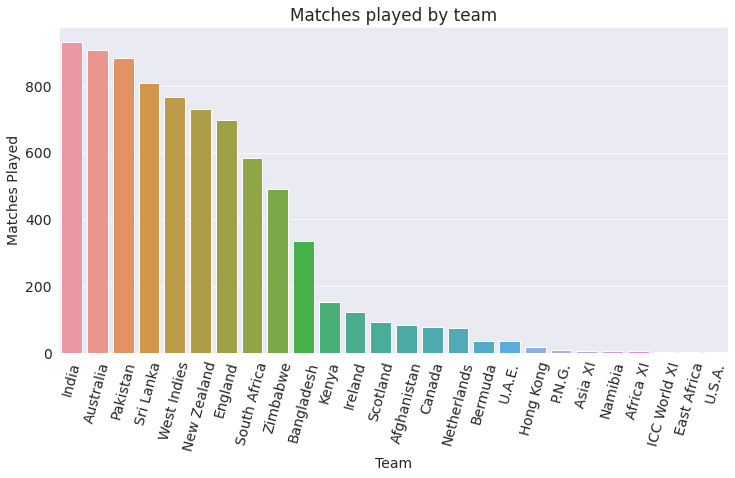

In [129]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchplayed3.index, y=Matchplayed3.values)
plt.ylabel('Matches Played')
plt.xlabel('Team')
plt.title("Matches played by team")

### We can see that India played most matches among all teams and USA played least matches, also we can see 10 teams played most matches. Lets see which are top 10 teams and how matches they played in total out of all matches.

In [27]:
Matchplayed4=Matchplayed3.head(10)

Text(0.5, 1.0, 'Most matches played by top 10 teams')

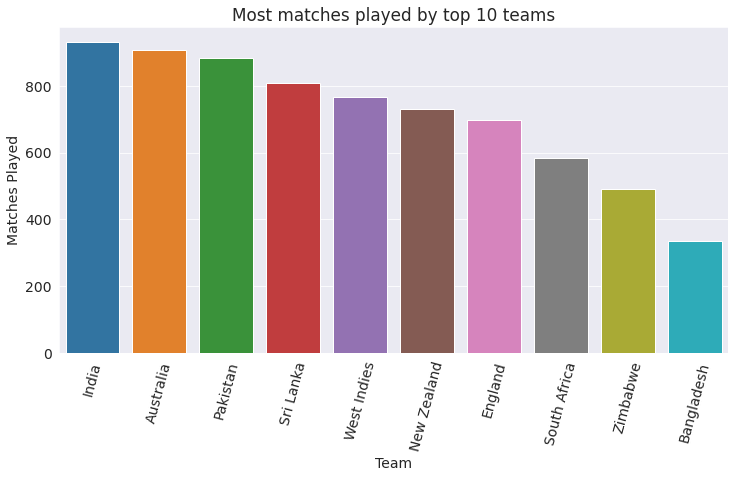

In [28]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchplayed4.index, y=Matchplayed4.values)
plt.ylabel('Matches Played')
plt.xlabel('Team')
plt.title("Most matches played by top 10 teams")

In [ ]:
plot = Matchplayed4.plot.pie(y=Matchplayed4.values*100/3932, figsize=(50, 15),autopct="%.1f%%",labels=Matchplayed4.index)
plt.legend(title = "Teams:")
plt.title("Percent of matches played by top 10 team ")

## Counting winning matches by teams till now 

In [29]:
Most_wining_teams=cricket_df3.Winner.value_counts()
Most_wining_teams

Australia       555
India           476
Pakistan        469
West Indies     380
Sri Lanka       372
South Africa    361
England         343
New Zealand     324
no result       140
Zimbabwe        129
Bangladesh      105
Ireland          51
Kenya            42
Afghanistan      42
tied             34
Scotland         31
Netherlands      28
Canada           17
U.A.E.            9
Bermuda           7
Hong Kong         6
P.N.G.            5
Asia XI           4
ICC World XI      1
Africa XI         1
Name: Winner, dtype: int64

Text(0.5, 1.0, 'Matches won by team')

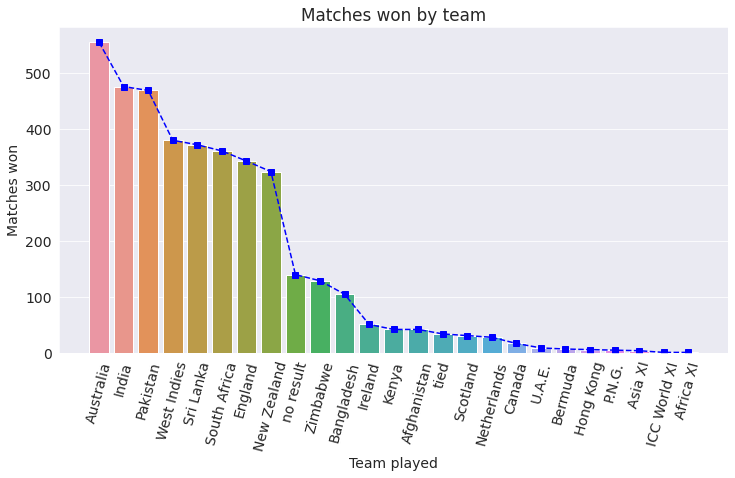

In [105]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Most_wining_teams.index,y=Most_wining_teams.values)
plt.plot(Most_wining_teams,'s--b')
plt.ylabel('Matches won')
plt.xlabel('Team played')
plt.title("Matches won by team")

## Winning percentage of each team

For this we have to divide winner teams by match played by them. 

In [31]:
import numpy as np
Matchwon=Most_wining_teams.div(Matchplayed3,fill_value=0).multiply(100).sort_values(ascending=False)
Matchwon.replace([np.inf, -np.inf], np.nan, inplace=True)
Matchwon.dropna(inplace=True)
Matchwon

South Africa    61.921098
Australia       61.258278
Asia XI         57.142857
Pakistan        53.054299
India           51.182796
Afghanistan     50.602410
P.N.G.          50.000000
West Indies     49.543677
England         49.210904
Sri Lanka       46.039604
New Zealand     44.322845
Ireland         41.463415
Netherlands     36.842105
Scotland        33.333333
Hong Kong       33.333333
Bangladesh      31.343284
Kenya           27.272727
Zimbabwe        26.272912
U.A.E.          25.714286
ICC World XI    25.000000
Canada          22.077922
Bermuda         20.000000
Africa XI       16.666667
U.S.A.           0.000000
East Africa      0.000000
Namibia          0.000000
dtype: float64

Text(0.5, 1.0, 'Winning percent % of team')

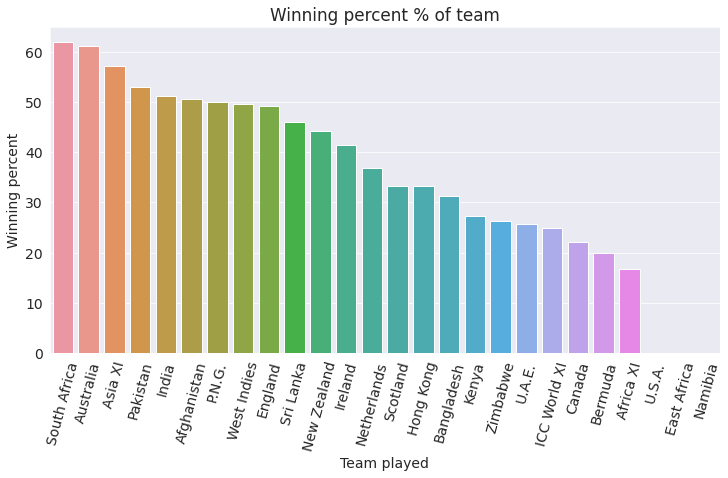

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchwon.index,y=Matchwon.values)
#plt.plot(Most_wining_teams,'s--b')
plt.ylabel('Winning percent')
plt.xlabel('Team played')
plt.title("Winning percent % of team")

### Inferences- So here we can infer that South Africa won 61 percent of matches it played followed by Australia. But we can see here that Asia XI and PNG have also high winning percent despite playing less matches which is because they won most of the matches they played. 

### So for better picture we will calculate winning percentages of top 10 teams  

In [34]:
Most_wining_teams_new=Most_wining_teams.drop(labels='no result')
Most_wining_teams_top=Most_wining_teams_new.head(10)
Matchwon_top=Most_wining_teams_top.div(Matchplayed4,fill_value=0).multiply(100).sort_values(ascending=False)
Matchwon_top.replace([np.inf, -np.inf], np.nan, inplace=True)
Matchwon_top.dropna(inplace=True)
Matchwon_top

South Africa    61.921098
Australia       61.258278
Pakistan        53.054299
India           51.182796
West Indies     49.543677
England         49.210904
Sri Lanka       46.039604
New Zealand     44.322845
Bangladesh      31.343284
Zimbabwe        26.272912
dtype: float64

We have to drop no result value because when we do series operation on Most_wining_teams, Matchplayed 4 has one index no results which makes value zero for corresponding team in series matchwon_top as most_winning_top should not consist no result index

Text(0.5, 1.0, 'Winning percent of top 10 teams')

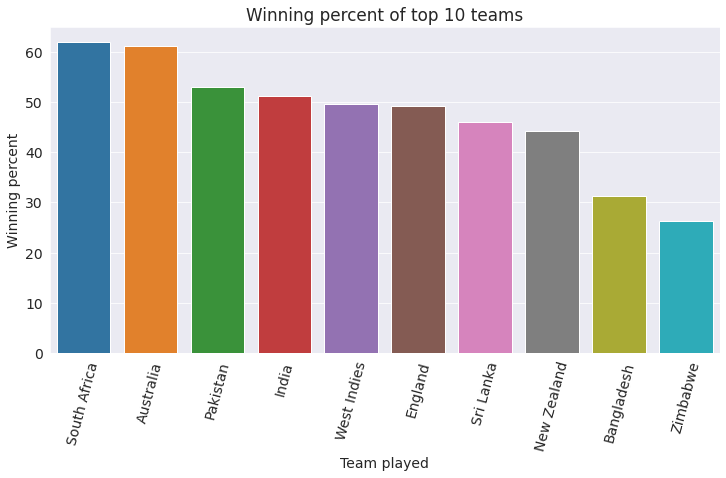

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchwon_top.index,y=Matchwon_top.values)
#plt.plot(Most_wining_teams,'s--b')
plt.ylabel('Winning percent')
plt.xlabel('Team played')
plt.title("Winning percent of top 10 teams")

### Most successful team since 2007 

For this we need to filter dataset from 2007 to 2017

In [36]:
cricket_df4=cricket_df3.copy()
cricket_df4

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Year
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,1971
1,ODI # 2,England,Australia,England,6 wickets,Manchester,1972
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,1972
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,1972
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,1973
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,2017
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,2017
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,2017


We need to convert Match year column into interger data type for easy filtering

In [37]:
cricket_df4['Match Year'] = cricket_df4['Match Year'].astype(int)
cricket_df4
rslt_df = cricket_df4.loc[cricket_df4['Match Year'] > 2006]
rslt_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Year
2469,ODI # 2470,New Zealand,Sri Lanka,New Zealand,4 wickets,Christchurch,2007
2470,ODI # 2471,New Zealand,Sri Lanka,Sri Lanka,189 runs,Auckland,2007
2471,ODI # 2472,New Zealand,Sri Lanka,no result,no result,Hamilton,2007
2472,ODI # 2473,Australia,England,Australia,8 wickets,Melbourne,2007
2473,ODI # 2474,Australia,New Zealand,Australia,105 runs,Hobart,2007
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,2017
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,2017
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,2017


In [38]:
Matchp=rslt_df['Team 1'].value_counts()
Matchplayed_n=rslt_df['Team 2'].value_counts()
Matchplayed_new=Matchp.add(Matchplayed_n,fill_value=0).sort_values(ascending=False)
Matchplayed_new

Sri Lanka       298.0
India           295.0
Australia       271.0
England         249.0
Pakistan        236.0
New Zealand     228.0
South Africa    217.0
West Indies     211.0
Bangladesh      192.0
Zimbabwe        177.0
Ireland         120.0
Scotland         83.0
Afghanistan      83.0
Kenya            72.0
Canada           58.0
Netherlands      55.0
U.A.E.           26.0
Bermuda          23.0
Hong Kong        16.0
P.N.G.           10.0
Asia XI           3.0
Africa XI         3.0
dtype: float64

Text(0.5, 1.0, 'Most matches played by teams between 2007-2017')

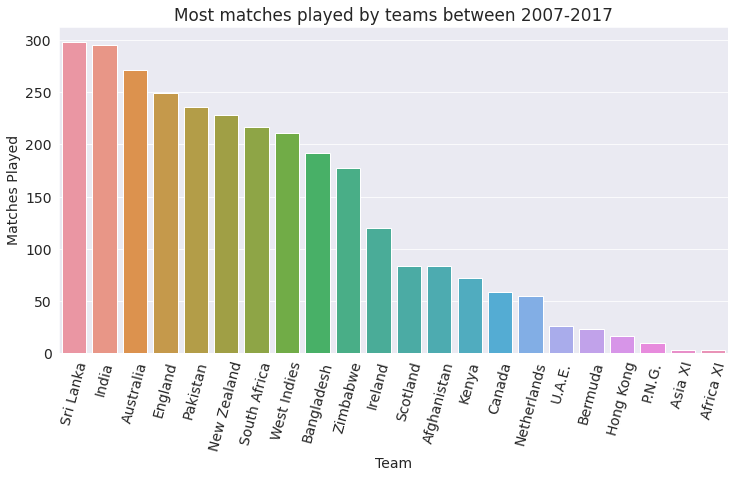

In [40]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchplayed_new.index, y=Matchplayed_new.values)
plt.ylabel('Matches Played')
plt.xlabel('Team')
plt.title("Most matches played by teams between 2007-2017")

Text(0.5, 1.0, 'Average matches played by teams per year between 2007-2017')

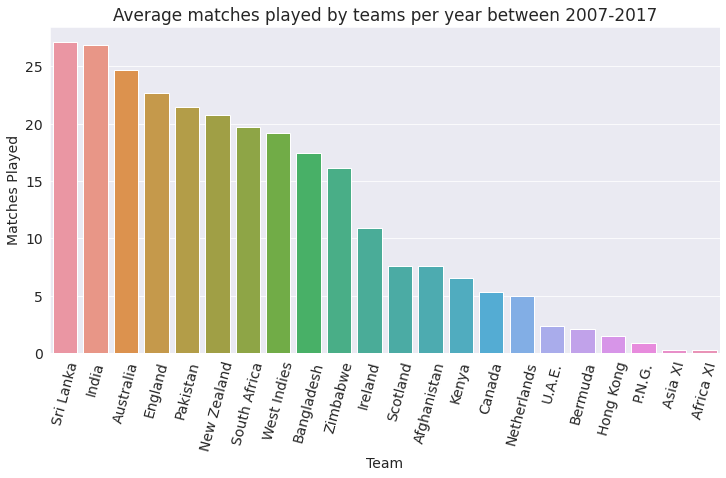

In [42]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchplayed_new.index, y=Matchplayed_new.values/11)
plt.ylabel('Matches Played')
plt.xlabel('Team')
plt.title("Average matches played by teams per year between 2007-2017")

### Infernces- Sri Lanka has played most matches between 2007, it is evident from the fact that Sri Lanka reached finals of 2007 and 2011 World Cup , India is second country followed by Australia. Zimbabwe and Ireland played very less matches during this period. Average matches played by Ireland and Scotland per year are 4 to 5 times lesser than Sri Lanka and India

In [43]:
Most_wining_teams_2=rslt_df.Winner.value_counts()
Most_wining_teams_2

India           178
Australia       167
Sri Lanka       141
South Africa    136
England         127
Pakistan        121
New Zealand     111
Bangladesh       77
West Indies      72
no result        61
Zimbabwe         51
Ireland          50
Afghanistan      42
Scotland         30
Netherlands      24
Kenya            23
Canada           14
tied             13
U.A.E.            8
Hong Kong         6
P.N.G.            5
Bermuda           3
Asia XI           3
Name: Winner, dtype: int64

Text(0.5, 1.0, 'Matches won by teams in 2007-2017')

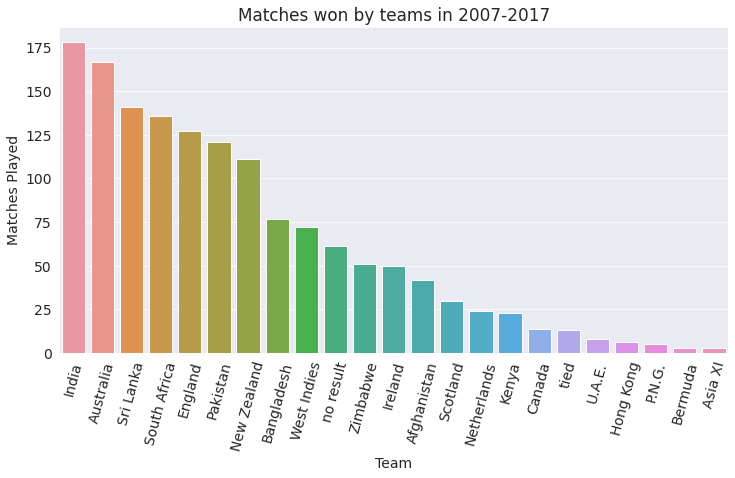

In [107]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Most_wining_teams_2.index, y=Most_wining_teams_2.values)
plt.ylabel('Matches Played')
plt.xlabel('Team')
plt.title("Matches won by teams in 2007-2017")

## Performance of India in this decade 

In [93]:
rslt_df2=rslt_df.loc[(rslt_df['Team 1']=='India') | (rslt_df['Team 2']=='India')]
rslt_df3=rslt_df2.groupby('Match Year')
rslt_df4=rslt_df3.Scorecard.count()

#rslt_df5=rslt_df2.loc[(rslt_df2['Winner']=='India') | (rslt_df2['Winner']=='no result') | (rslt_df2['Winner']=='tied') ]
rslt_df6=rslt_df2.loc[(rslt_df2['Winner']=='India')]
rslt_df6

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Year
2479,ODI # 2480,India,West Indies,India,14 runs,Nagpur,2007
2484,ODI # 2485,India,West Indies,India,20 runs,Cuttack,2007
2492,ODI # 2493,India,West Indies,India,160 runs,Vadodara,2007
2521,ODI # 2522,India,Sri Lanka,India,5 wickets,Margao,2007
2524,ODI # 2525,India,Sri Lanka,India,7 wickets,Visakhapatnam,2007
...,...,...,...,...,...,...,...
3911,ODI # 3912,India,Australia,India,50 runs,Kolkata,2017
3913,ODI # 3914,India,Australia,India,5 wickets,Indore,2017
3918,ODI # 3919,India,Australia,India,7 wickets,Nagpur,2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,2017


In [ ]:
rslt_df7=rslt_df6.groupby('Match Year')
rslt_df8=rslt_df7.Winner.count()

Text(0.5, 1.0, 'Matches played by India between 2007-2017')

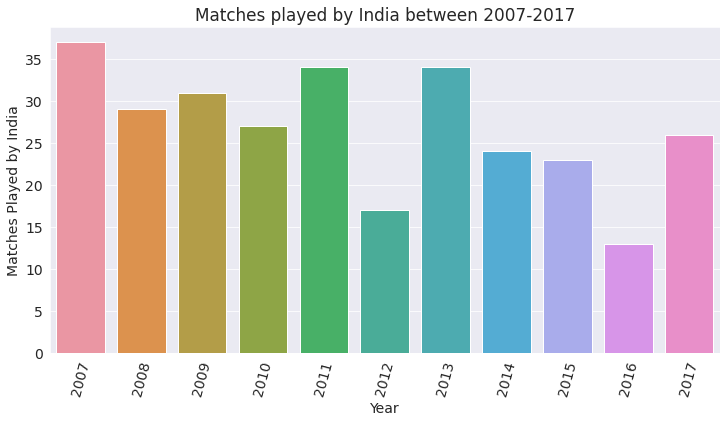

In [95]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=rslt_df4.index, y=rslt_df4.values)
plt.ylabel('Matches Played by India')
plt.xlabel('Year')
plt.title("Matches played by India between 2007-2017")

Text(0.5, 1.0, 'Matches won by India between 2007-2017')

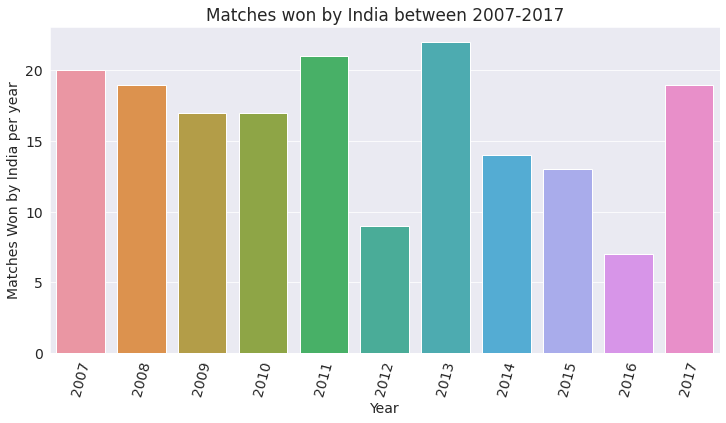

In [96]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=rslt_df8.index, y=rslt_df8.values)
plt.ylabel('Matches Won by India per year')
plt.xlabel('Year')
plt.title("Matches won by India between 2007-2017")

In [97]:
print(rslt_df4)
print(rslt_df8)

Match Year
2007    37
2008    29
2009    31
2010    27
2011    34
2012    17
2013    34
2014    24
2015    23
2016    13
2017    26
Name: Scorecard, dtype: int64
Match Year
2007    20
2008    19
2009    17
2010    17
2011    21
2012     9
2013    22
2014    14
2015    13
2016     7
2017    19
Name: Winner, dtype: int64


Above series show matches played and won by India between 2007 and 2017

### Winning percentage in each year of India

In [99]:
rslt_df9=rslt_df8.div(rslt_df4,fill_value=0).multiply(100).sort_values(ascending = False)
rslt_df9

Match Year
2017    73.076923
2008    65.517241
2013    64.705882
2010    62.962963
2011    61.764706
2014    58.333333
2015    56.521739
2009    54.838710
2007    54.054054
2016    53.846154
2012    52.941176
dtype: float64

Text(0.5, 1.0, ' Percent % of matches won by India between 2007-2017')

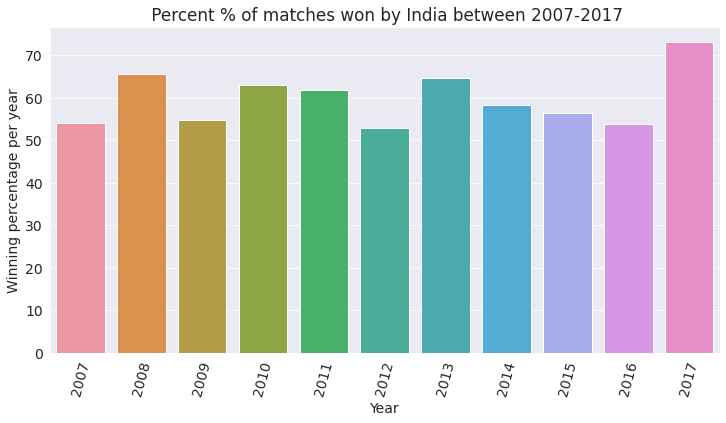

In [101]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=rslt_df9.index, y=rslt_df9.values)
plt.ylabel('Winning percentage per year')
plt.xlabel('Year')
plt.title(" Percent % of matches won by India between 2007-2017")

Let us save and upload our work to Jovian before continuing

In [130]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "utsavs64/performance-of-teams-in-odi-cricket-matches" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches


'https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches'

## Asking and Answering Questions





#### Q1. Which team played most matches since 1971?

Text(0.5, 1.0, 'Most matches played by top 10 teams')

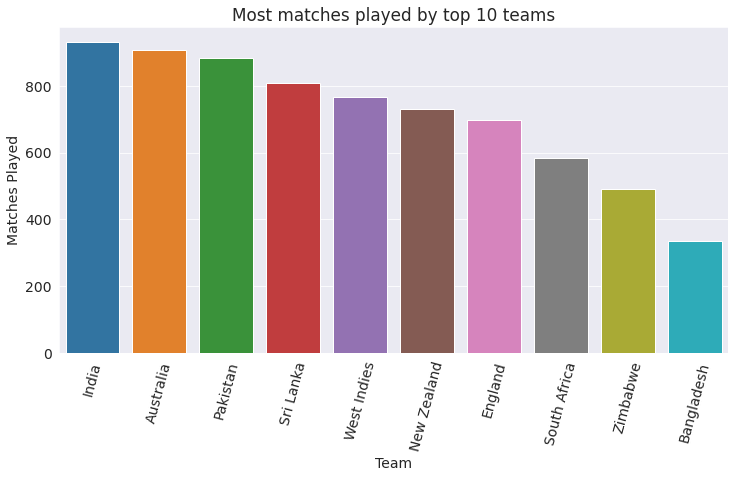

In [103]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchplayed4.index, y=Matchplayed4.values)
plt.ylabel('Matches Played')
plt.xlabel('Team')
plt.title("Most matches played by top 10 teams")

## Inferences

### So India played most matches till now followed by Australia and Pakistan

#### Q2: Which team won most matches it played since 1971?

Text(0.5, 1.0, 'Most matches won by team')

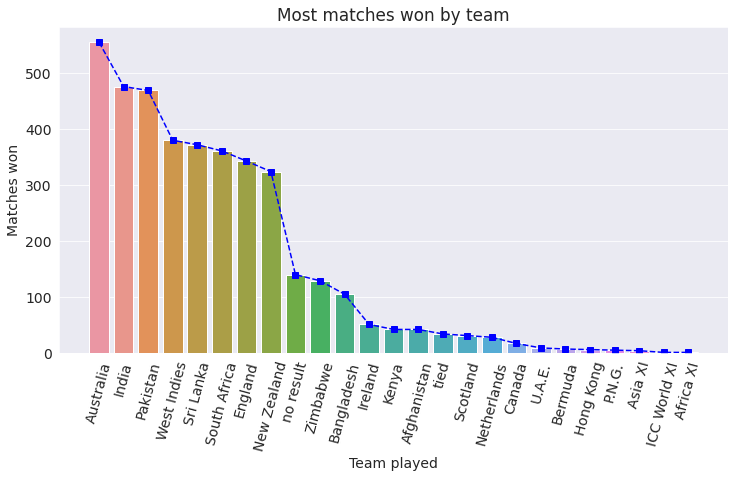

In [104]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Most_wining_teams.index,y=Most_wining_teams.values)
plt.plot(Most_wining_teams,'s--b')
plt.ylabel('Matches won')
plt.xlabel('Team played')
plt.title("Most matches won by team")

### Inferences- Australia won most matches since 1971 followed by India and Pakistan 

#### Q3: Which team has highest winning percentage out of matches it played?

Text(0.5, 1.0, 'Winning percent of top 10 teams')

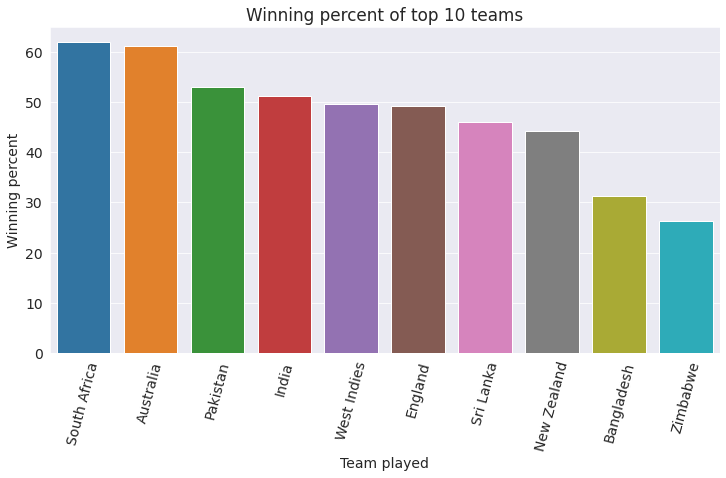

In [106]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchwon_top.index,y=Matchwon_top.values)
#plt.plot(Most_wining_teams,'s--b')
plt.ylabel('Winning percent')
plt.xlabel('Team played')
plt.title("Winning percent of top 10 teams")

### Infernces- South Africa has highest winning percent for matches it played till now followed by Australia 




#### Q4: Which is the most succesful team between 2007 to 2017?

Text(0.5, 1.0, 'Matches played by teams between 2007-2017')

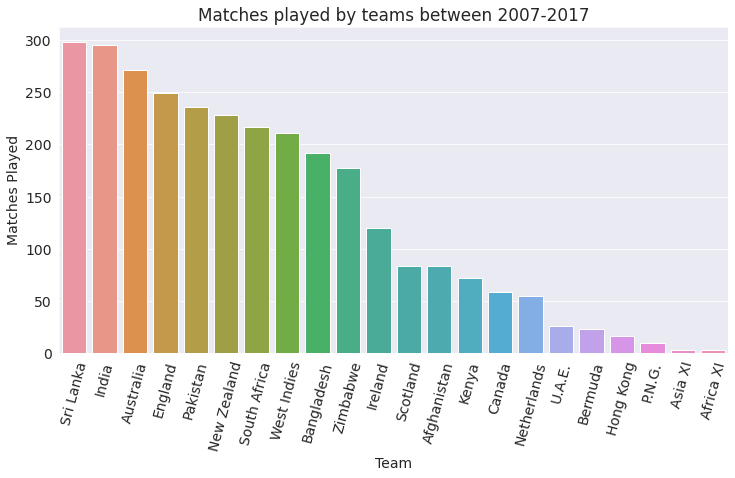

In [109]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Matchplayed_new.index, y=Matchplayed_new.values)
plt.ylabel('Matches Played')
plt.xlabel('Team')
plt.title("Matches played by teams between 2007-2017")

Text(0.5, 1.0, 'Most Matches won by teams in 2007-2017')

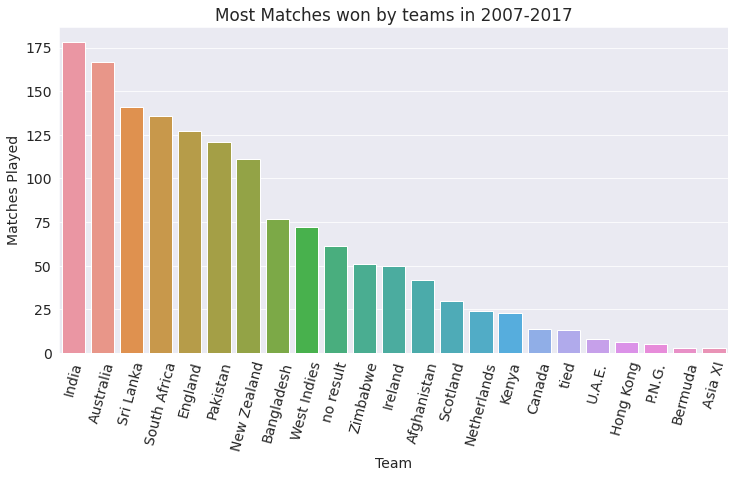

In [108]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Most_wining_teams_2.index, y=Most_wining_teams_2.values)
plt.ylabel('Matches Played')
plt.xlabel('Team')
plt.title("Most Matches won by teams in 2007-2017")

### India won most matches in this decade , though it played lesser matches than Sri Lanka, it won most matches in this decade but this cant clearly infer the best team as we need to find which team won most matches out of it played. 

### Best performing team between 2007-2017 

In [115]:
Matchplayed_new2=Matchplayed_new.head(10)
Matchplayed_new2

Sri Lanka       298.0
India           295.0
Australia       271.0
England         249.0
Pakistan        236.0
New Zealand     228.0
South Africa    217.0
West Indies     211.0
Bangladesh      192.0
Zimbabwe        177.0
dtype: float64

In [120]:
Most_wining_teams_3=Most_wining_teams_2.copy()
Most_wining_teams_3=Most_wining_teams_3.drop(labels='no result')
Most_wining_teams_3=Most_wining_teams_3.drop(labels='tied')
Most_wining_teams_3=Most_wining_teams_3.head(10)
Most_wining_teams_3

India           178
Australia       167
Sri Lanka       141
South Africa    136
England         127
Pakistan        121
New Zealand     111
Bangladesh       77
West Indies      72
Zimbabwe         51
Name: Winner, dtype: int64

In [123]:
Best_team_df=Most_wining_teams_3.div(Matchplayed_new2,fill_value=0).multiply(100).sort_values(ascending=False)
Best_team_df

South Africa    62.672811
Australia       61.623616
India           60.338983
Pakistan        51.271186
England         51.004016
New Zealand     48.684211
Sri Lanka       47.315436
Bangladesh      40.104167
West Indies     34.123223
Zimbabwe        28.813559
dtype: float64

Text(0.5, 1.0, 'Best team between 2007-2017 in terms of match win')

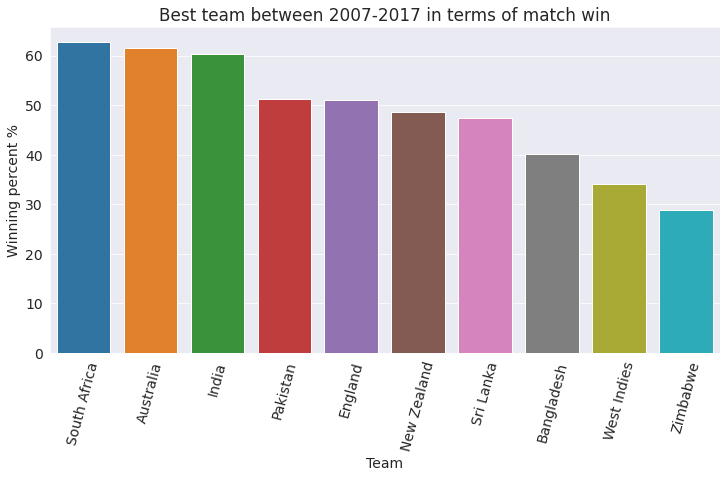

In [125]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=Best_team_df.index, y=Best_team_df.values)
plt.ylabel('Winning percent %')
plt.xlabel('Team')
plt.title("Best team between 2007-2017 in terms of match win")

### South Africa once agains outperform other teams and a clear winner in terms of performance between 2007-2017. Although it has never won any ICC trophy since 1971.  

#### Q5: Which is the best year for India between 2007-2017 in terms of winning?

Text(0.5, 1.0, ' Percent % of matches won by India between 2007-2017')

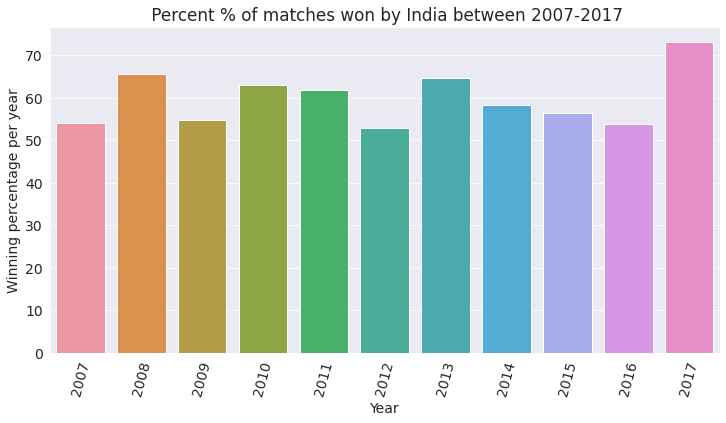

In [111]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x=rslt_df9.index, y=rslt_df9.values)
plt.ylabel('Winning percentage per year')
plt.xlabel('Year')
plt.title(" Percent % of matches won by India between 2007-2017")

### Inferences- So in 2017, India played 26 matches and won 19 of them, it was the year when Virat Kohli led India lost to Pakistan in the Champion's Trophy , first time in any ICC championship.¶

Let us save and upload our work to Jovian before continuing.

In [127]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "utsavs64/performance-of-teams-in-odi-cricket-matches" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches


'https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches'

## Inferences and Conclusion

**Conclusion** - So here we analysed our dataset using Pandas tool and extracted infernces and trends through matplotlib tool. We saw India played most matches since 1971 but Australia won most matches. Although Australia won most matches but South Africa's performance was better in terms of matches it played and won. Similarly between 2007 to 2017 Sri Lanka played most matches but here India won most matches. Again in terms of winning ratio, South africa once again topped the list. We can draw various other colclusions too by analysing dataset further. Hope to this in future. 

In [126]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "utsavs64/performance-of-teams-in-odi-cricket-matches" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches


'https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches'

## References and Future Work

Further we can analyse data of team Yearwise and groundwise by downloading continuos dataset. Will update new notebook in future for sure.

In [128]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "utsavs64/performance-of-teams-in-odi-cricket-matches" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches


'https://jovian.ai/utsavs64/performance-of-teams-in-odi-cricket-matches'